## Problem Statement: Automatically detect Lung Opacities

**SUMMARY**

Description : The file contains logic for Exploratory data analysis.

Below steps were performed for Pre-Processing, Data Visualization, EDA,

  1.   Exploring the given Data files, classes and images of different
  classes.  
  2.   Dealing with missing values  
  3.   Visualization of different classes  
  4.   Analysis from the visualization of different classes
  5.   Balanced data distribution 

**Mentor Recommendation**


1. Balanced data distribution - Done  
2. Image masking - Pending

## Sample Images of Lung Opacities

1. Normal Image



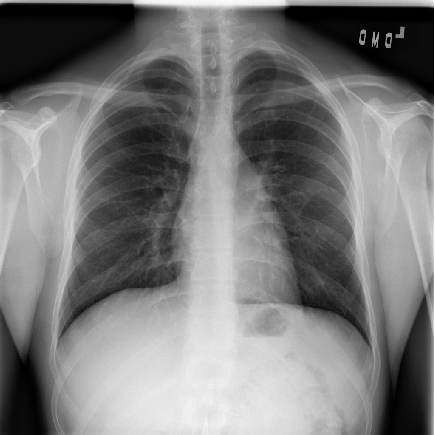

In X-ray, tissues with sparse material such as lungs which are full of air, do not absorb the X-rays and therefore appear black in the image. Dense tissues such as bones absorb X-rays and appear white.



*   Black - Air
*   White - Bones
*   Grey - Tissue


2.  Image with Lung opacities

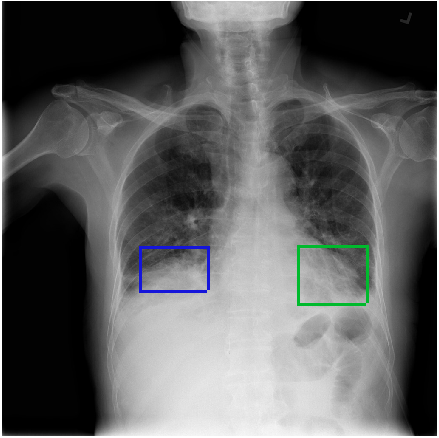

Usually, lungs are full of air. When someone has pneumonia, the air in the lungs is replaced by other material – fluids, bacteria, immune system cells, etc. That’s why areas of opacities are areas that are grey but should be more black. When we see them we understand that the lung tissue in that area is probably not healthy.

What makes the problem more challenging is that not all opacities show Pneumonia symptoms. See example of a lung that is not normal because it has opacities that are nodular, such types of opacities are not associated with Pneumonia. Pneumonia-related opacities look more like fuzzy clouds Image 1.

3. Lung Nodules and Masses

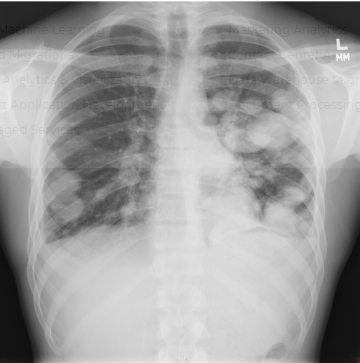

## 1. Data Preprocessing, Visualization, EDA

### Explore CSV Data


**Data Preprocessing**

In [0]:
#Import all necessary packages
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('dark')

**Dataset: data_class**

In [0]:
data_class = pd.read_csv('/content/drive/My Drive/Colab Notebooks/CAPSTONE/Data/stage_2_detailed_class_info.csv/stage_2_detailed_class_info.csv')
project_path = '/content/drive/My Drive/Colab Notebooks/CAPSTONE/Data/'
print(data_class.shape)
data_class.head()

(30227, 2)


,patientId,class
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,No Lung Opacity / Not Normal
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,No Lung Opacity / Not Normal
2,00322d4d-1c29-4943-afc9-b6754be640eb,No Lung Opacity / Not Normal
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,Normal
4,00436515-870c-4b36-a041-de91049b9ab4,Lung Opacity



* No Lung Opacity/ Not Normal: Not Normal, No Pneumonia
* Normal: No Pneumonia
* Lung Opacity: Pneumonia

Are the PatientIds unique?

In [0]:
data_class['patientId'].value_counts()

1c44e0a4-4612-438f-9a83-8d5bf919cb67    4
0ab261f9-4eb5-42ab-a9a5-e918904d6356    4
ee820aa5-4804-4984-97b3-f0a71d69702f    4
8dc8e54b-5b05-4dac-80b9-fa48878621e2    4
3239951b-6211-4290-b237-3d9ad17176db    4
                                       ..
d7131b83-ef4c-4a0a-b1a2-d09c163bda48    1
2973b99b-fd24-44f6-a15a-7e2c7263a527    1
e1d8cc12-d372-48f2-9126-74660809eccf    1
bc376e0b-3c4f-414c-b2e7-1a085e87976a    1
2ea47f2a-f72d-4de6-8620-d54d44bd5ea9    1
Name: patientId, Length: 26684, dtype: int64

1 Patientid can have 1 or more bounding boxes implies Lung opacity > Pneumonia

**Dataset: data_labels**

In [0]:
data_labels = pd.read_csv('/content/drive/My Drive/Colab Notebooks/CAPSTONE/Data/stage_2_train_labels.csv/stage_2_train_labels.csv')
print(data_labels.shape)
data_labels.head()

(30227, 6)


,patientId,x,y,width,height,Target
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,NaN,NaN,NaN,NaN,0
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,NaN,NaN,NaN,NaN,0
2,00322d4d-1c29-4943-afc9-b6754be640eb,NaN,NaN,NaN,NaN,0
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,NaN,NaN,NaN,NaN,0
4,00436515-870c-4b36-a041-de91049b9ab4,264.0,152.0,213.0,379.0,1


* Target 0 : No Pneumonia
* Target 1 : Pneumonia
* All rows with x, y, height, width as NaN means they dont have pneumonia while the rest have more than 1 area of pneumonia detected.

In [0]:
data = data_class.merge(data_labels, left_on = 'patientId', right_on = 'patientId', how = 'inner')
print(data.shape)
data.head()

(37629, 7)


,patientId,class,x,y,width,height,Target
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,No Lung Opacity / Not Normal,NaN,NaN,NaN,NaN,0
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,No Lung Opacity / Not Normal,NaN,NaN,NaN,NaN,0
2,00322d4d-1c29-4943-afc9-b6754be640eb,No Lung Opacity / Not Normal,NaN,NaN,NaN,NaN,0
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,Normal,NaN,NaN,NaN,NaN,0
4,00436515-870c-4b36-a041-de91049b9ab4,Lung Opacity,264.0,152.0,213.0,379.0,1


In [0]:
data = data.drop_duplicates()
data.shape

(30227, 7)

In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30227 entries, 0 to 37626
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   patientId  30227 non-null  object 
 1   class      30227 non-null  object 
 2   x          9555 non-null   float64
 3   y          9555 non-null   float64
 4   width      9555 non-null   float64
 5   height     9555 non-null   float64
 6   Target     30227 non-null  int64  
dtypes: float64(4), int64(1), object(2)
memory usage: 1.8+ MB


In [0]:
#Find missing values
data.isnull().sum()

patientId        0
class            0
x            20672
y            20672
width        20672
height       20672
Target           0
dtype: int64

Null data are the ones who do not have Pneumonia, hence don't have bounding box coordinates.

In [0]:
#Below show all Pneumonia positive cases.
data[data['Target'] == 1]

,patientId,class,x,y,width,height,Target
4,00436515-870c-4b36-a041-de91049b9ab4,Lung Opacity,264.0,152.0,213.0,379.0,1
5,00436515-870c-4b36-a041-de91049b9ab4,Lung Opacity,562.0,152.0,256.0,453.0,1
10,00704310-78a8-4b38-8475-49f4573b2dbb,Lung Opacity,323.0,577.0,160.0,104.0,1
11,00704310-78a8-4b38-8475-49f4573b2dbb,Lung Opacity,695.0,575.0,162.0,137.0,1
18,00aecb01-a116-45a2-956c-08d2fa55433f,Lung Opacity,288.0,322.0,94.0,135.0,1
...,...,...,...,...,...,...,...
37616,c1e73a4e-7afe-4ec5-8af6-ce8315d7a2f2,Lung Opacity,316.0,504.0,179.0,273.0,1
37619,c1ec14ff-f6d7-4b38-b0cb-fe07041cbdc8,Lung Opacity,609.0,464.0,240.0,284.0,1
37620,c1ec14ff-f6d7-4b38-b0cb-fe07041cbdc8,Lung Opacity,185.0,298.0,228.0,379.0,1
37625,c1f7889a-9ea9-4acb-b64c-b737c929599a,Lung Opacity,570.0,393.0,261.0,345.0,1


Create a column that captures no. of bounding boxes

In [0]:
data['bb_nos'] = data.groupby(['patientId'])['x'].transform('count')
data.head(10)

,patientId,class,x,y,width,height,Target,bb_nos
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,No Lung Opacity / Not Normal,NaN,NaN,NaN,NaN,0,0
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,No Lung Opacity / Not Normal,NaN,NaN,NaN,NaN,0,0
2,00322d4d-1c29-4943-afc9-b6754be640eb,No Lung Opacity / Not Normal,NaN,NaN,NaN,NaN,0,0
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,Normal,NaN,NaN,NaN,NaN,0,0
4,00436515-870c-4b36-a041-de91049b9ab4,Lung Opacity,264.0,152.0,213.0,379.0,1,2
5,00436515-870c-4b36-a041-de91049b9ab4,Lung Opacity,562.0,152.0,256.0,453.0,1,2
8,00569f44-917d-4c86-a842-81832af98c30,No Lung Opacity / Not Normal,NaN,NaN,NaN,NaN,0,0
9,006cec2e-6ce2-4549-bffa-eadfcd1e9970,No Lung Opacity / Not Normal,NaN,NaN,NaN,NaN,0,0
10,00704310-78a8-4b38-8475-49f4573b2dbb,Lung Opacity,323.0,577.0,160.0,104.0,1,2
11,00704310-78a8-4b38-8475-49f4573b2dbb,Lung Opacity,695.0,575.0,162.0,137.0,1,2


### Explore DICOM Images

In [0]:
import os
train_img_path = os.listdir(project_path+'stage_2_train_images')
test_img_path = os.listdir(project_path+ 'stage_2_test_images')

print('No. of train images: {}'.format(len(train_img_path)))
print('No. of test images: {}'.format(len(test_img_path)))

No. of train images: 26684
No. of test images: 3000


No. of unique patientIDs is 26684 hence 26684 train images. While some of these are pneumonia patients with multiple bounding boxes, therefore 30227 rows in dataset. 

In [0]:
!pip3 install pydicom

In [0]:
#Each of these X-Rays have metadata associated like the one below
import pydicom, glob, pylab
import numpy as np

sample_patientId = data['patientId'][10] #No lung opacity/ Not normal
dcm_file = project_path+'stage_2_train_images/%s.dcm' % sample_patientId
dcm_data = pydicom.read_file(dcm_file)
print(dcm_data)

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 200
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: Secondary Capture Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.276.0.7230010.3.1.4.8323329.4188.1517874306.437231
(0002, 0010) Transfer Syntax UID                 UI: JPEG Baseline (Process 1)
(0002, 0012) Implementation Class UID            UI: 1.2.276.0.7230010.3.0.3.6.0
(0002, 0013) Implementation Version Name         SH: 'OFFIS_DCMTK_360'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0016) SOP Class UID                       UI: Secondary Capture Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.2.276.0.7230010.3.1.4.8323329.4188.1517874306.437231
(0008, 0020) Study Date                          DA: '19010101'
(0008, 0030) Study Time        

**Extract metadata info into dataset**

In [0]:
def collect_metadata(data, location):
  dcm_columns = None
  for n, pid in enumerate(data['patientId'].unique()):
    image_name = pid+'.dcm'
    image_path = os.path.join(project_path + location, image_name)
    dcm_data = pydicom.read_file(image_path)

    index = data[data['patientId'] == pid].index
    data.loc[index, 'patient_age'] = dcm_data.data_element("PatientAge").value
    data.loc[index, 'patient_sex'] = dcm_data.data_element('PatientSex').value
    data.loc[index, 'view_position'] = dcm_data.data_element('ViewPosition').value

In [0]:
#data_s = data[0:5000]
#data_s

In [0]:
#collect_metadata(data, 'stage_2_train_images/')
data.head()

,patientId,class,x,y,width,height,Target,bb_nos
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,No Lung Opacity / Not Normal,NaN,NaN,NaN,NaN,0,0
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,No Lung Opacity / Not Normal,NaN,NaN,NaN,NaN,0,0
2,00322d4d-1c29-4943-afc9-b6754be640eb,No Lung Opacity / Not Normal,NaN,NaN,NaN,NaN,0,0
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,Normal,NaN,NaN,NaN,NaN,0,0
4,00436515-870c-4b36-a041-de91049b9ab4,Lung Opacity,264.0,152.0,213.0,379.0,1,2


In [0]:
#data.info()
#data.to_csv('Data_Final.csv')

### Load the result into pickle file

In [0]:
import pickle
file_name = "data_pickle"
#open file for writing
file_object = open(file_name, 'wb') #write binary
#dump result into pickle file
pickle.dump(data, file_object)
#close file
file_object.close()


In [0]:
#Open pickle file for reading
file_object = open(file_name, 'rb') #read binary
data_final = pickle.load(file_object)
data_final.head()

,patientId,class,x,y,width,height,Target,bb_nos
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,No Lung Opacity / Not Normal,NaN,NaN,NaN,NaN,0,0
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,No Lung Opacity / Not Normal,NaN,NaN,NaN,NaN,0,0
2,00322d4d-1c29-4943-afc9-b6754be640eb,No Lung Opacity / Not Normal,NaN,NaN,NaN,NaN,0,0
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,Normal,NaN,NaN,NaN,NaN,0,0
4,00436515-870c-4b36-a041-de91049b9ab4,Lung Opacity,264.0,152.0,213.0,379.0,1,2


In [0]:
data_final = pd.read_csv(project_path+'Data_Final.csv')
data_final.head()

,Unnamed: 0,patientId,class,x,y,width,height,Target,bb_nos,patient_age,patient_sex,view_position
0,0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,No Lung Opacity / Not Normal,NaN,NaN,NaN,NaN,0,0,51,F,PA
1,1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,No Lung Opacity / Not Normal,NaN,NaN,NaN,NaN,0,0,48,F,PA
2,2,00322d4d-1c29-4943-afc9-b6754be640eb,No Lung Opacity / Not Normal,NaN,NaN,NaN,NaN,0,0,19,M,AP
3,3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,Normal,NaN,NaN,NaN,NaN,0,0,28,M,PA
4,4,00436515-870c-4b36-a041-de91049b9ab4,Lung Opacity,264.0,152.0,213.0,379.0,1,2,32,F,AP


### Function to display Images

In [0]:
def display_images(data):
    img_data = list(data.T.to_dict().values())
    #img_data = list(data)
    f, ax = plt.subplots(1,3, figsize=(16,18))
    for i,data_row in enumerate(img_data):
        imageName = data_row['patientId']+'.dcm'
        imagePath = os.path.join(project_path+"/stage_2_train_images/",imageName)
        data_row_img = pydicom.dcmread(imagePath)
        ax[i%3].imshow(data_row_img.pixel_array, cmap=plt.cm.bone) 
        ax[i%3].axis('off')
        ax[i%3].set_title('ID: {}\nClass: {}'.format(
                data_row['patientId'], data_row['class']))
    plt.show()


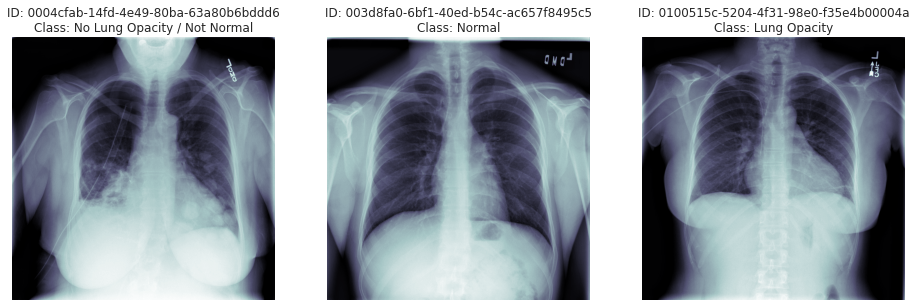

In [0]:
sample_3 = ['0004cfab-14fd-4e49-80ba-63a80b6bddd6', '003d8fa0-6bf1-40ed-b54c-ac657f8495c5','0100515c-5204-4f31-98e0-f35e4b00004a']
sample_data = data[data['patientId'].isin(sample_3)]
display_images(sample_data)

### Function to apply bounding boxes on image

In [0]:
from matplotlib.patches import Rectangle
def display_images_with_boxes(data):
    img_data = list(data.T.to_dict().values())
    f, ax = plt.subplots(1,3, figsize=(16,18))
    for i,data_row in enumerate(img_data):
        imageName = data_row['patientId']+'.dcm'
        imagePath = os.path.join(project_path+"/stage_2_train_images/",imageName)
        data_row_img = pydicom.dcmread(imagePath)
        ax[i%3].imshow(data_row_img.pixel_array, cmap=plt.cm.bone) 
        ax[i%3].axis('off')
        ax[i%3].set_title('ID: {}\nClass: {}'.format(
                data_row['patientId'], data_row['class']))
        rows = data[data['patientId']==data_row['patientId']]
        box_data = list(rows.T.to_dict().values())
        for j, row in enumerate(box_data):
            ax[i%3].add_patch(Rectangle(xy=(row['x'], row['y']),
                        width=row['width'],height=row['height'], 
                        linewidth=1,edgecolor='r',facecolor='none'))   
    plt.show()

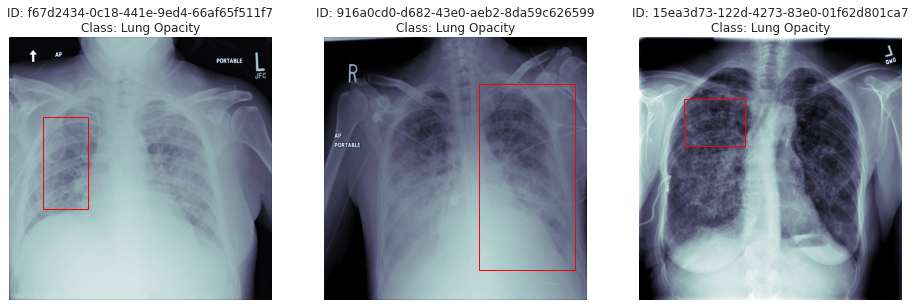

In [0]:
sample_tar_df = data[data['Target']==1].sample(3)
display_images_with_boxes(sample_tar_df)

## Visualization, Exploratory Data Analytics

* 1. Understand data distribution for continuous and categorical variables
* 2. How big/ small are the bounding boxes

**Understand the distribution of Continuous variables (x, y, width, height,patient_age)**

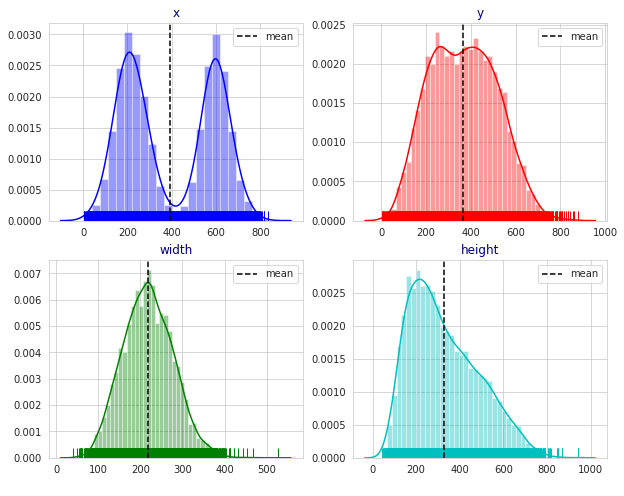

In [0]:
#Distribution of Bounding Boxes
#We use only the rows which have bounding boxes
data_bb = data_final[data_final['Target'] == 1]
data_bb = data_bb[['x','y','width','height']]
sns.set_style('whitegrid')

cols = [i for i in data_bb.columns]
length = len(cols)
fig = plt.figure(figsize = (10,8))

import itertools
cs = ["b","r","g","c"]
for i,j,k in itertools.zip_longest(cols, range(length), cs):
  plt.subplot(2,2, j+1)
  ax = sns.distplot(data_bb[i], color = k, rug = True)
  ax.set_facecolor("w")
  plt.axvline(data_bb[i].mean(), linestyle = 'dashed', label = 'mean', color = 'k')
  plt.legend(loc = 'best')
  plt.title(i, color = 'navy')
  plt.xlabel(" ")



*   x graph shows slightly more probability of pneumonia infection on left lung 
*   y graph shows pneumonia infection starts from the bottom part of the lung 



In [0]:
#Create a new column 'area' to capture of area of bounding boxes
data_final['area'] = data_final['height'] * data_final['width']

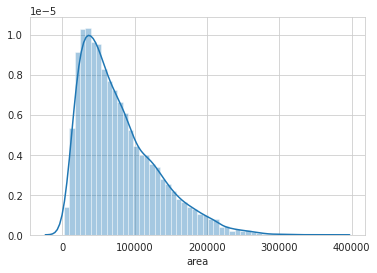

In [0]:
#Distribution of infected areas
sns.distplot(data_final['area'])

This graph has right skewed distribution which means the major chunk of bounding boxes areas are smaller than the rest of them. Implies many of the patients are in the initial stages of pneumonia. 

In [0]:
#as patient_age column has dtype of 'object' therefore converting to 'int64'
data_final['patient_age'] = data_final['patient_age'].astype('int64')
data_final.describe(include = 'all')

,Unnamed: 0,patientId,class,x,y,width,height,Target,bb_nos,patient_age,patient_sex,view_position,area
count,30227.000000,30227,30227,9555.000000,9555.000000,9555.000000,9555.000000,30227.000000,30227.000000,30227.000000,30227,30227,9555.000000
unique,NaN,26684,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2,NaN
top,NaN,1c44e0a4-4612-438f-9a83-8d5bf919cb67,No Lung Opacity / Not Normal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,M,AP,NaN
freq,NaN,4,11821,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17216,15297,NaN
mean,19034.105237,NaN,NaN,394.047724,366.839560,218.471376,329.269702,0.316108,0.560989,46.797764,NaN,NaN,77523.448038
std,10751.986393,NaN,NaN,204.574172,148.940488,59.289475,157.750755,0.464963,0.877502,16.892940,NaN,NaN,51807.689206
min,0.000000,NaN,NaN,2.000000,2.000000,40.000000,45.000000,0.000000,0.000000,1.000000,NaN,NaN,2320.000000
25%,9916.500000,NaN,NaN,207.000000,249.000000,177.000000,203.000000,0.000000,0.000000,34.000000,NaN,NaN,37535.500000
50%,18875.000000,NaN,NaN,324.000000,365.000000,217.000000,298.000000,0.000000,0.000000,49.000000,NaN,NaN,64829.000000
75%,28741.500000,NaN,NaN,594.000000,478.500000,259.000000,438.000000,1.000000,1.000000,59.000000,NaN,NaN,106491.500000


There are errors in age column showing ages of 148, 150, 151, 153, 155.We have to correct it.

In [0]:
#Using modulo
data_final['patient_age'] = data_final['patient_age'].apply(lambda x: x % 100 if x > 100 else x)


In [0]:
data_final.describe()

,Unnamed: 0,x,y,width,height,Target,bb_nos,patient_age,area
count,30227.000000,9555.000000,9555.000000,9555.000000,9555.000000,30227.000000,30227.000000,30227.000000,9555.000000
mean,19034.105237,394.047724,366.839560,218.471376,329.269702,0.316108,0.560989,46.781222,77523.448038
std,10751.986393,204.574172,148.940488,59.289475,157.750755,0.464963,0.877502,16.839379,51807.689206
min,0.000000,2.000000,2.000000,40.000000,45.000000,0.000000,0.000000,1.000000,2320.000000
25%,9916.500000,207.000000,249.000000,177.000000,203.000000,0.000000,0.000000,34.000000,37535.500000
50%,18875.000000,324.000000,365.000000,217.000000,298.000000,0.000000,0.000000,49.000000,64829.000000
75%,28741.500000,594.000000,478.500000,259.000000,438.000000,1.000000,1.000000,59.000000,106491.500000
max,37626.000000,835.000000,881.000000,528.000000,942.000000,1.000000,4.000000,92.000000,371184.000000


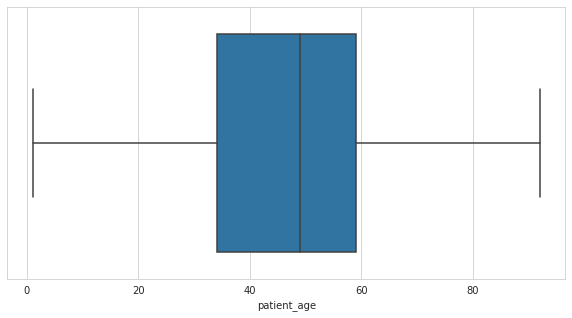

In [0]:
#Distribution of patient_age
plt.figure(figsize = (10,5))
sns.boxplot(data_final['patient_age'])

This boxplot shows the major chunk of patient age distribution is between 34-59. 

In [0]:
#Lets bin to further understand the distribution.
bins = 0,34,50,75,100
labels = ['Young Adults','Adults','Seniors','Old']
data_final['patient_age_cat'] = pd.cut(data_final['patient_age'], bins=bins, labels=labels, right=False)
data_final.head()


,Unnamed: 0,patientId,class,x,y,width,height,Target,bb_nos,patient_age,patient_sex,view_position,area,patient_age_cat
0,0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,No Lung Opacity / Not Normal,NaN,NaN,NaN,NaN,0,0,51,F,PA,NaN,Seniors
1,1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,No Lung Opacity / Not Normal,NaN,NaN,NaN,NaN,0,0,48,F,PA,NaN,Adults
2,2,00322d4d-1c29-4943-afc9-b6754be640eb,No Lung Opacity / Not Normal,NaN,NaN,NaN,NaN,0,0,19,M,AP,NaN,Young Adults
3,3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,Normal,NaN,NaN,NaN,NaN,0,0,28,M,PA,NaN,Young Adults
4,4,00436515-870c-4b36-a041-de91049b9ab4,Lung Opacity,264.0,152.0,213.0,379.0,1,2,32,F,AP,80727.0,Young Adults


**Understand the distribution of Categorical variables (bb_nos, target_class, patient_sex)**

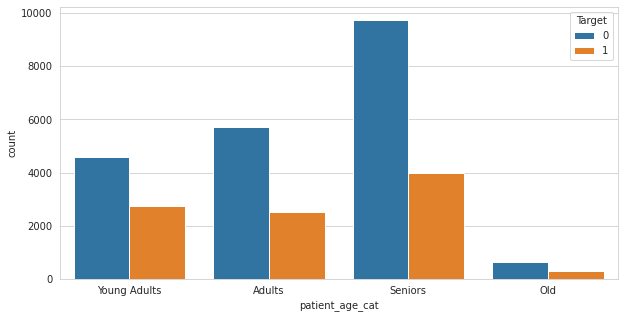

In [0]:
#Distribution of patient_age
plt.figure(figsize = (10,5))
sns.countplot(x = 'patient_age_cat', data = data_final, hue = 'Target')

As we see, data contains more no. of 'Seniors' & 'Young Adults' infected with Pneumonia. But as the dataset distribution is not balanced therefore we cannot make concrete inferences.

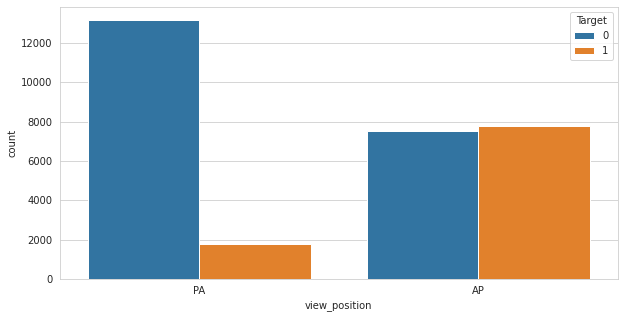

In [0]:
#Distribution of view_position
plt.figure(figsize = (10,5))
sns.countplot(x = 'view_position', data = data_final, hue = 'Target')

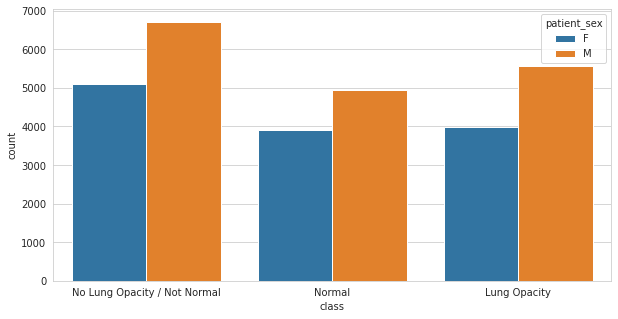

In [0]:
#Distribution of class versus gender
plt.figure(figsize = (10,5))
sns.countplot(x = 'class', data = data_final, hue = 'patient_sex')

Data distribution is imbalanced with more datapoints for 'Male', 'Seniors' & 'No Lung Opacity/ Not Normal'  

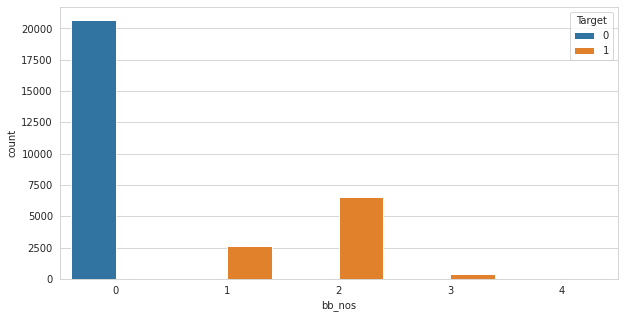

In [0]:
#distribution of bb_nos
plt.figure(figsize = (10,5))
sns.countplot(x = 'bb_nos', data = data_final, hue = 'Target')

Significant no. of images contain more than 1 bounding box. While larger portion of the dataset has no bounding boxes.

Inorder to put this into the model, the data distribution has to be well balanced with respect to 
* Class
* Gender
* View Position
* Age
 

**Train & Validation split**

In [0]:
from sklearn.model_selection import train_test_split
train_data, val_data = train_test_split(data_final, test_size = 0.20, stratify = data_final['class'])
print('Training data: {}'.format(train_data.shape))
print('Validation data: {}'. format(val_data.shape))

Training data: (24181, 14)
Validation data: (6046, 14)


## Balancing the data distribution of Training set

**Balanced by Class**

In [0]:
train_data['class'].value_counts()

No Lung Opacity / Not Normal    9456
Lung Opacity                    7644
Normal                          7081
Name: class, dtype: int64

We will have to balance data such that each class would have 7000 rows only.

21000 new training size


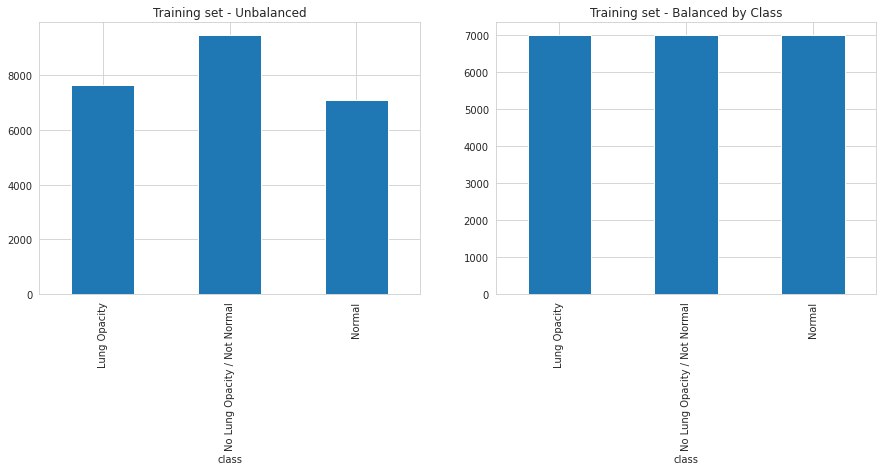

In [0]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (15,5))
ax1.set_title('Training set - Unbalanced')
ax2.set_title('Training set - Balanced by Class')
train_data.groupby('class').size().plot.bar(ax = ax1)

bal_train_data = train_data.groupby('class').apply(lambda x: x.sample(21000 // 3)).reset_index(drop = True) #using only 21000 as 7000 for every row is needed
bal_train_data.groupby('class').size().plot.bar(ax = ax2)
print(bal_train_data.shape[0], 'new training size')

In [0]:
bal_train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21000 entries, 0 to 20999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Unnamed: 0       21000 non-null  int64   
 1   patientId        21000 non-null  object  
 2   class            21000 non-null  object  
 3   x                7000 non-null   float64 
 4   y                7000 non-null   float64 
 5   width            7000 non-null   float64 
 6   height           7000 non-null   float64 
 7   Target           21000 non-null  int64   
 8   bb_nos           21000 non-null  int64   
 9   patient_age      21000 non-null  int64   
 10  patient_sex      21000 non-null  object  
 11  view_position    21000 non-null  object  
 12  area             7000 non-null   float64 
 13  patient_age_cat  21000 non-null  category
dtypes: category(1), float64(5), int64(4), object(4)
memory usage: 2.1+ MB


In [0]:
bal_train_data['patient_sex'].value_counts()

M    11946
F     9054
Name: patient_sex, dtype: int64

18000 new training size


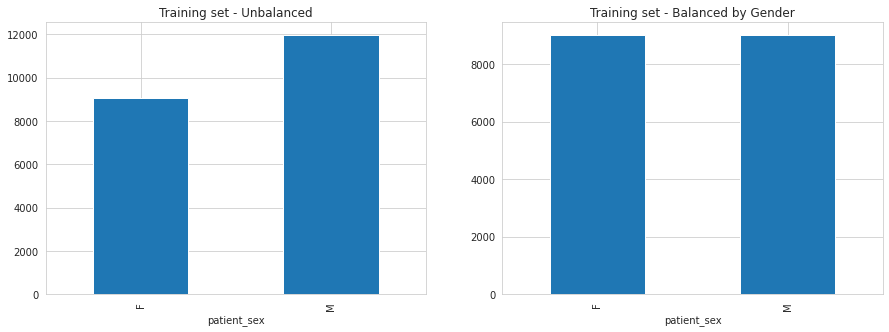

In [0]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (15,5))
ax1.set_title('Training set - Unbalanced')
ax2.set_title('Training set - Balanced by Gender')
bal_train_data.groupby('patient_sex').size().plot.bar(ax = ax1)

bal_train_data = bal_train_data.groupby('patient_sex').apply(lambda x: x.sample(18000 // 2)).reset_index(drop = True)
bal_train_data.groupby('patient_sex').size().plot.bar(ax = ax2)
print(bal_train_data.shape[0], 'new training size')

In [0]:
bal_train_data['patient_age_cat'].value_counts()

Seniors         8080
Adults          5017
Young Adults    4390
Old              513
Name: patient_age_cat, dtype: int64

In [0]:
print('Balanced training data: {}'. format(bal_train_data.shape))
print('Validation data: {}'. format(val_data.shape))

Balanced training data: (18000, 14)
Validation data: (6046, 14)


We can also balance the dataset in terms of age category, since the dataset is small as compared to 4 categories of Ages hence we won't proceed with it.

## Image Masking - Pending